## This file is used to generate the wordcloud for any of the comment categories

In [1]:
import nltk
from nltk.corpus import webtext 
  
# use to find bigrams, which are pairs of words 
from nltk.collocations import BigramCollocationFinder 
from nltk.metrics import BigramAssocMeasures 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns
import MySQLdb
import pandas as pd
import mysql.connector
import sqlalchemy 
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import mysql.connector
import glob
import os
from urllib.parse import urlparse
from urllib.parse import urlparse, parse_qs
import statistics
import math
from nltk.util import ngrams
from collections import Counter

In [2]:
import pandas as pd
df = pd.read_csv('data/comments_all.csv')

## we are considering only few types of the comments
df=df[df['commentClassification'].isin(['BUGGYCODE_SUGGESTION','REFACTORING_SUGGESTION','CODE_SUGGESTION','QUESTIONING',
                    'COMPLETENESS_SUGGESTION','LOGISTICS_SUGGESTION','LOGICAL_SUGGESTION','SPELLING_SUGGESTION',
                     'REUSE_SUGGESTION','DOCUMENTATION_SUGGESTION'])]
df=df.reset_index()
df.commentClassification.value_counts()

BUGGYCODE_SUGGESTION        988
REFACTORING_SUGGESTION      925
CODE_SUGGESTION             906
QUESTIONING                 545
COMPLETENESS_SUGGESTION     417
LOGISTICS_SUGGESTION        350
LOGICAL_SUGGESTION          316
SPELLING_SUGGESTION         217
REUSE_SUGGESTION             64
DOCUMENTATION_SUGGESTION     36
Name: commentClassification, dtype: int64

In [3]:
df.head()

,index,commentId,prId,commentText,author,commentClassification
0,0,155228690,868,Please remove it and folder `PaymentsOld` comp...,Himadri Ghosh,CODE_SUGGESTION
1,1,155229152,868,"Are we are not using these strings? then, plea...",Himadri Ghosh,REFACTORING_SUGGESTION
2,2,155230749,868,Call `:paymentId` as `:warehouseId` so that it...,Himadri Ghosh,SPELLING_SUGGESTION
3,3,155231144,868,"No need to make it caps, Button by default sho...",Himadri Ghosh,CODE_SUGGESTION
4,4,155231888,868,Follow `No pending invoices` instead of `No Pe...,Himadri Ghosh,SPELLING_SUGGESTION


In [4]:
from Utility import commonUtilities as cu

In [5]:
def getConnectionString():
    conn=mysql.connector.connect(user='rohit', password='xjkrrbrWpAsKKAGf',host='eagleeye-sd.ckjulgq8jktj.ap-south-1.rds.amazonaws.com',port='3306',database='athenaLogs')
    return conn

In [6]:
def generalDBquery(sqlQuery):
    conn = getConnectionString()
    cursor = conn.cursor()
    sqlSelect=sqlQuery
    df=pd.read_sql_query(sqlSelect,conn)
    return df

In [7]:
def generateWordFrequencies(domain_unigrams,domain_bigrams,domain_trigrams,domain_quadgrams,outfile):
    threshold=0
    delimitPattern='^^'
    finalList={}
    
    with open(outfile, encoding='utf-8-sig', mode='a') as fp:
        fp.write('N|ngram|freq\n')
        cntObj=Counter(domain_unigrams)
        sortedCounterList=cntObj.most_common()                 
        for tag, count in sortedCounterList:
            N="Unigram"
            unigramString=tag[0]
            #print(unigramString,count)
            if(unigramString.find(delimitPattern) == -1):
                if(count>threshold):
        #             unigramKey=''.unigramString[0]
                    finalList[unigramString]=count
                    fp.write('{}|{}|{}\n'.format(N,unigramString, count))

        cntObj=Counter(domain_bigrams)
        sortedCounterList=cntObj.most_common()
        
        for tag, count in sortedCounterList:
            N="Bigram"
            bigramString=tag[0]+"_"+tag[1]
            #print(bigramString,count)
            if(bigramString.find(delimitPattern) == -1):
                if(count>threshold):
                    finalList[bigramString]=count
                    fp.write('{}|{}|{}\n'.format(N,bigramString, count))


        cntObj=Counter(domain_trigrams)
        sortedCounterList=cntObj.most_common()
        for tag, count in sortedCounterList:
            N="Trigram"
            trigramString=tag[0]+"_"+tag[1]+"_"+tag[2]
            #print(trigramString,count)
            if(trigramString.find(delimitPattern) == -1):
                if(count>threshold):
                    finalList[trigramString]=count
                    fp.write('{}|{}|{}\n'.format(N,trigramString, count))

        cntObj=Counter(domain_quadgrams)
        sortedCounterList=cntObj.most_common()
        for tag, count in sortedCounterList:
            N="Quad"
            quadString=tag[0]+"_"+tag[1]+"_"+tag[2]+"_"+tag[3]
            #print(trigramString,count)
            if(quadString.find(delimitPattern) == -1):
                if(count>threshold):
                    finalList[quadString]=count
                    fp.write('{}|{}|{}\n'.format(N,quadString, count))

                
    return finalList

In [15]:
from wordcloud import WordCloud
def createWordCloud(combinedDict):
    wordcloud = WordCloud(background_color="white", max_words=2000,max_font_size=40, random_state=42)
    wordcloud.generate_from_frequencies(frequencies=combinedDict)
    plt.figure(figsize=[10, 5])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [8]:
def getStopWords():
    #standard english
    englishStopWords = set(['a','in','about','ain','all','am','an','and','any','are','aren',"aren't",'as','at','be','because','been','being','both','by','can','d','did','during','each','few','for','from','further','he','her','here','hers','herself','him','himself','his','how','i','if','is','isn',"isn't",'it',"it's",'its','itself','just','ll','m','ma','me','mightn',"mightn't",'more','most','mustn',"mustn't",'my','myself','needn','o','of','once','only','or','other','our','ours','ourselves','own','re','s','same','shan',"shan't",'she',"she's",'should',"should've",'shouldn',"shouldn't",'so','some','such','t','than','that',"that'll",'the','their','theirs','them','themselves','then','there','these','they','this','those','through','to','too','until','ve','very','was','wasn',"wasn't",'we','were','weren',"weren't",'what','when','where','which','while','who','whom','why','will','with','won',"won't",'wouldn',"wouldn't",'y','you',"you'd","you'll","you're","you've",'your','yours','yourself','yourselves'])
    englishStopWords.remove('can')
    #domainspecific..later on should come from db
    domain_words=set(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','gms','xg','pcs','q','r','s','t','u','v','w','x','y','z','ml','rs','kg','gm','pc','mrp','new','old','more','ltr'])
    #domain_words_extra=set(['pouch','carton','bizom','shrink','line','gms','gm','jar','pwd','pet','xg','kgx','pcs','bopp','tin','red','cc','pp','bottle','gold','super','mono','golden','premium','free','white','nw','pack','np','black','sachet','mr','ctn','tetra','ig','xkg','lit','box','ice','green','bag','rb','offer','lb','lt','mini','km','btl','promo','gxn','classic','pk','pkt','cbb','mlx','big','delite','special','solar','lp','ch','tb','ic','small','xgm','regular','xx','hs','gxx','sp','liner','supreme','nirmal','zone','kewal','kgs','opening','closing','shelves','godown','shelf','fsu','floor','stack','gx','townbus','mm','rbm','cp','empty','nd','value','hdpe','ltrx','gmx','plastic','pj','bulk','fun','exchange','stb','bl','delight','extra','platinum','select','bopppp','three','gr','csd','pure','full','vp','xml','nat','str','combi','lm','rgb','pt','ltrs','ab','agmark','poly','krishna','‚äì','mansion','house','tub','excellence','olein','s¬†','flavor','scheme','shubh','stick','rich','case','asap','one','label','xxgm','indian','high','original','bot','litre','cut','xxg','bottles','canz','test','packs','jarxx','diff','amp','lbs'])
    #domain_words=domain_words.union(domain_words_extra)
    stop_words=englishStopWords.union(domain_words)
    return list(stop_words)


In [9]:
def generateNgramsLists(dfsubset):
    domainSpecificStr=''
    for i in range(0,dfsubset.shape[0]):
        #print(lstSKUNames[i])
        lstSKUNames=dfsubset.iloc[i]['commentText']
        removePunctuationText=cu.cleanupSKUName(lstSKUNames)
        tokenizedString=nltk.word_tokenize(removePunctuationText.lower())
        tokens_without_sw=cu.removeStopWords(tokenizedString,getStopWords())

        #tokenizedString=nltk.word_tokenize(tokens_without_sw)
        res=list(set(tokens_without_sw))
        if len(res)==0:
            res=tokenizedString
        #print("normalized:",' '.join(res))
        domainSpecificStr+=' '.join(res)
        domainSpecificStr+=' ^^ '

    #print(domainSpecificStr)

    #generate the ngrams
    domainTokens = nltk.word_tokenize(domainSpecificStr)
    domain_unigrams=ngrams(domainTokens,1)
    domain_bigrams = ngrams(domainTokens,2)
    domain_trigrams = ngrams(domainTokens,3)
    domain_quadgrams = ngrams(domainTokens,4)
    return domain_unigrams,domain_bigrams,domain_trigrams,domain_quadgrams

In [24]:
subDf=df[df['commentClassification']=='CODE_SUGGESTION']
domain_unigrams,domain_bigrams,domain_trigrams,domain_quadgrams=generateNgramsLists(subDf)
finalList=generateWordFrequencies(domain_unigrams,domain_bigrams,domain_trigrams,domain_quadgrams,"ngrams_file.csv")
#sort the dictionary
newDict={k: v for k, v in sorted(finalList.items(), key=lambda item: item[1],reverse=True)}

In [25]:
newDict

{'can': 204,
 'please': 202,
 'use': 190,
 'add': 109,
 'not': 103,
 '’': 92,
 'check': 79,
 '\u200c': 73,
 'need': 65,
 'also': 64,
 'instead': 64,
 'do': 62,
 'id': 58,
 'key': 55,
 'have': 54,
 'const': 52,
 'make': 50,
 'data': 50,
 'like': 47,
 'on': 41,
 'condition': 41,
 'keep': 40,
 'remove': 39,
 'code': 38,
 'function': 37,
 'change': 35,
 'array': 35,
 'using': 33,
 'class': 33,
 'query': 32,
 'point': 32,
 'variable': 32,
 'required': 32,
 'create': 31,
 'set': 31,
 'return': 30,
 'index': 29,
 'value': 29,
 'bfe': 29,
 'ea': 29,
 'acadc': 29,
 'type': 28,
 'null': 28,
 'no': 27,
 'component': 27,
 'get': 27,
 'props': 27,
 'string': 27,
 'import': 27,
 'default': 26,
 'don': 26,
 'user': 26,
 'object': 26,
 '“': 26,
 'file': 25,
 'empty': 25,
 'else': 24,
 'well': 24,
 'map': 24,
 'please_add': 24,
 'move': 23,
 'one': 22,
 'used': 22,
 'name': 21,
 'method': 21,
 'down': 20,
 'below': 20,
 'table': 20,
 '”': 20,
 'think': 19,
 'directly': 19,
 'above': 19,
 'case': 19,
 '

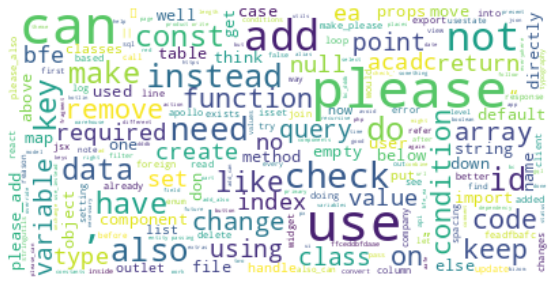

In [26]:
createWordCloud(newDict)